## I have used UCI Drug review data for drug analysis to gain valuable insights. It is basically an Exploratory Data Analysis project.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
train_data=pd.read_csv("E:\\data science\\dataset\\drug-analysis-dataset\\drugsComTrain_raw.csv")
print('Training data set')
print("train data shape--",train_data.shape)
print(train_data.head(10))
test_data=pd.read_csv("E:\\data science\\dataset\\drug-analysis-dataset\\drugsComTest_raw.csv")
print('Test data set')
print("test data shape--",test_data.shape)
print(test_data.head(10))

Training data set
train data shape-- (161297, 7)
   uniqueID                            drugName                     condition  \
0    206461                           Valsartan  Left Ventricular Dysfunction   
1     95260                          Guanfacine                          ADHD   
2     92703                              Lybrel                 Birth Control   
3    138000                          Ortho Evra                 Birth Control   
4     35696            Buprenorphine / naloxone             Opiate Dependence   
5    155963                              Cialis  Benign Prostatic Hyperplasia   
6    165907                      Levonorgestrel       Emergency Contraception   
7    102654                        Aripiprazole               Bipolar Disorde   
8     74811                              Keppra                      Epilepsy   
9     48928  Ethinyl estradiol / levonorgestrel                 Birth Control   

                                              review  ratin

In [39]:
data=pd.concat([train_data,test_data])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [40]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [41]:
# checking out the missing values
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [42]:
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [43]:
# dropping the rows with null values
data=data.dropna(axis=0)
print("updated data:",data.shape)

updated data: (213869, 7)


In [44]:
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

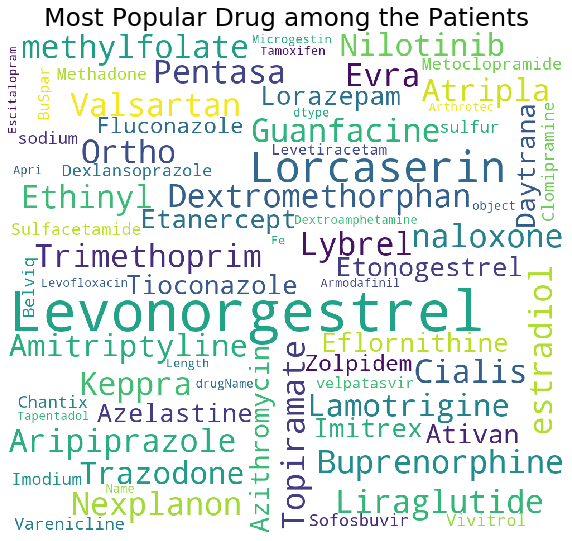

In [45]:
# Exploratory Data Analysis
# checking out the most popular drug using wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 100, width = 1000, height = 900).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Most Popular Drug among the Patients', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)

### So we found that Levonorgestrel and Lorcaserin are the most common/popular drugs among the patients.

In [80]:
commonCdf = data['condition'].value_counts().nlargest(15)
commonCdf

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Name: condition, dtype: int64

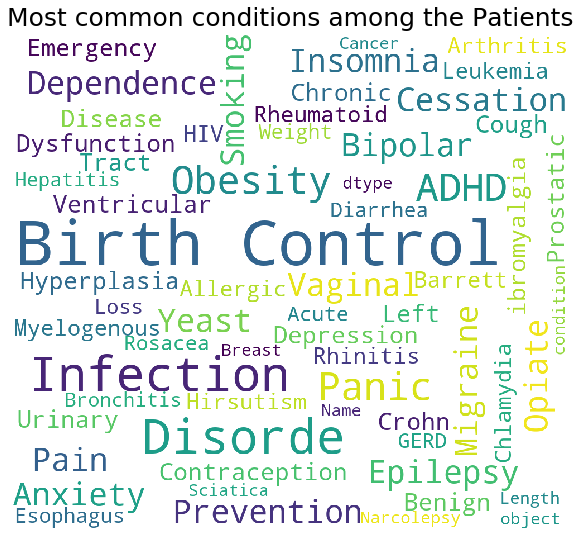

In [46]:
# to check what are some common conditions among the patients
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 100, width = 1000, height = 900).generate(str(data['condition']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Most common conditions among the Patients', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)

### So, we found that Birth Control, Infection, Disorder, Obesity are some common conditions among the patients.

In [47]:
#comparing the drugs with respective to their ratings given by patients.
features=['drugName','rating']
X=data[features]
X.head()

,drugName,rating
0,Valsartan,9
1,Guanfacine,8
2,Lybrel,5
3,Ortho Evra,8
4,Buprenorphine / naloxone,9


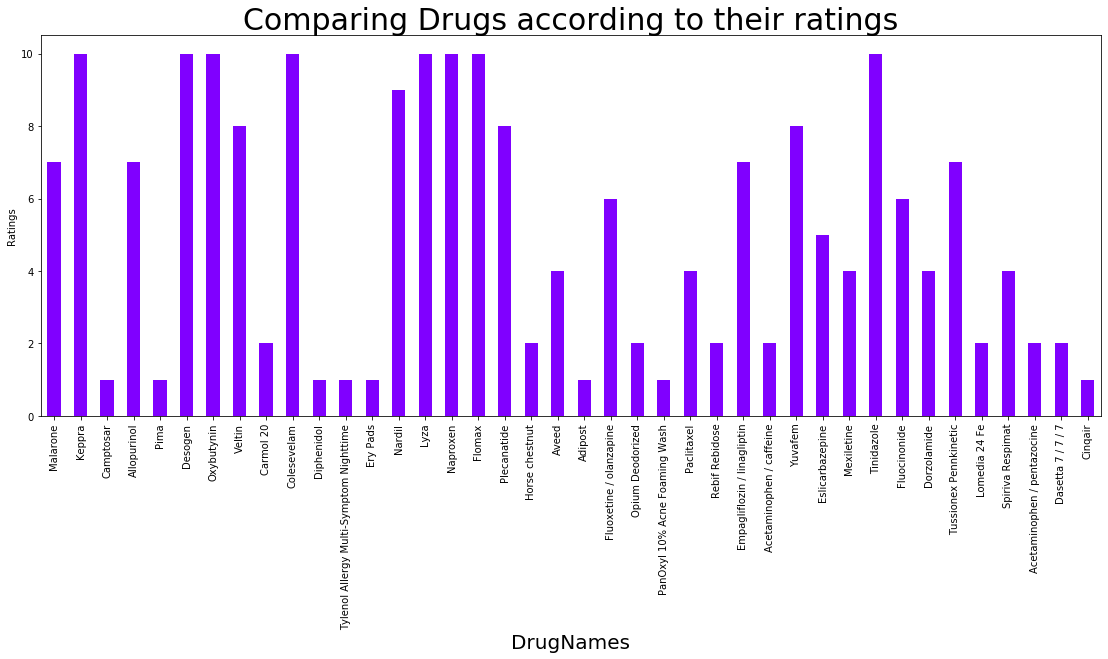

In [48]:
X.groupby(['drugName'])['rating'].nunique().sort_values(ascending = False).sample(40).plot.bar(figsize = (19, 7), cmap= 'rainbow')
plt.title('Comparing Drugs according to their ratings', fontsize = 30)
plt.xlabel('DrugNames', fontsize = 20)
plt.ylabel('Ratings')
plt.show()


In [49]:
# listing the drugs with minimum ratings
X.head()

,drugName,rating
0,Valsartan,9
1,Guanfacine,8
2,Lybrel,5
3,Ortho Evra,8
4,Buprenorphine / naloxone,9


In [50]:
print(X[X['rating'] < 5])


                                drugName  rating
5                                 Cialis       2
6                         Levonorgestrel       1
8                                 Keppra       1
12                               Pentasa       4
13                      Dextromethorphan       4
14                             Nexplanon       3
24                           Tioconazole       1
33                           Tioconazole       1
36                              Dulcolax       1
38                              MoviPrep       2
44                           Venlafaxine       4
48                            Tamsulosin       4
51                               Intuniv       1
53                                  Qvar       1
54                                Opdivo       1
56                              Pyridium       1
59                              Implanon       2
61      Drospirenone / ethinyl estradiol       3
63                              Implanon       1
68                  

In [51]:
data[data['rating']<5]

,uniqueID,drugName,condition,review,rating,date,usefulCount
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
12,191290,Pentasa,Crohn's Disease,"""I had Crohn&#039;s with a resection 30 years ...",4,6-Jul-13,8
13,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4,7-Sep-17,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
24,213649,Tioconazole,Vaginal Yeast Infection,"""Do not use the cream that comes with this. It...",1,17-Apr-17,7
33,214453,Tioconazole,Vaginal Yeast Infection,"""The burning is out of control about 20 minute...",1,11-Sep-15,2
36,125343,Dulcolax,Constipation,"""SO MUCH PAIN! \r\nIn the last 2 years I have ...",1,13-Feb-16,10
38,60678,MoviPrep,Bowel Preparation,"""I have taken this at least 5-6 times for the ...",2,29-Jun-17,0


### After giving a view to main dataframe, the drugs with less ratings have negative reviews too.

In [52]:
# feature engineering 
#from the above exploratory data analysis is found that the ones with ratings less than 5 have bad reviews so we here give them sentiment
# as 0 and the ones equal and above 5 are positive sentiments with 1 score.
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    160613
0.0     53256
Name: Review_Sentiment, dtype: int64

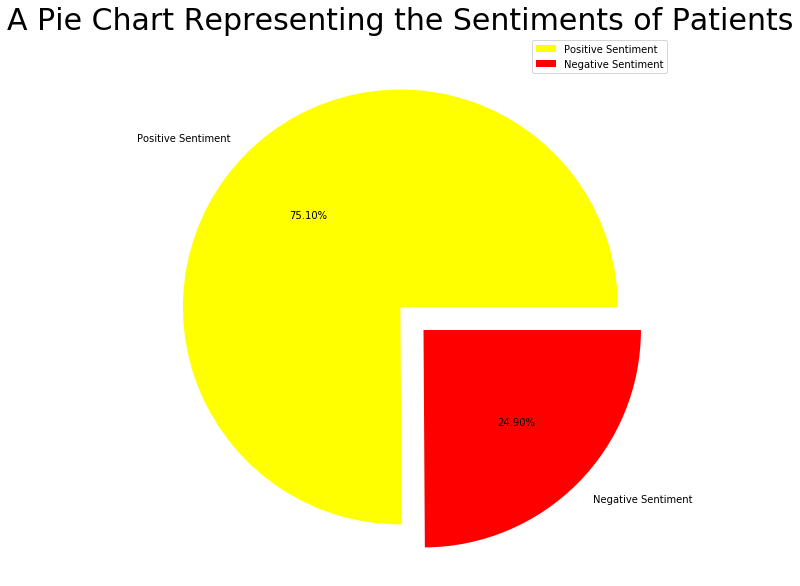

In [53]:
# a pie chart to represent the sentiments of the patients

size = [160613, 53256]
colors = ['yellow', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.15]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [54]:
data.info() # look in the output date is a non-null object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 8 columns):
uniqueID            213869 non-null int64
drugName            213869 non-null object
condition           213869 non-null object
review              213869 non-null object
rating              213869 non-null int64
date                213869 non-null object
usefulCount         213869 non-null int64
Review_Sentiment    213869 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 14.7+ MB


In [55]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

In [56]:
data.info() # now date is a datetime object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 8 columns):
uniqueID            213869 non-null int64
drugName            213869 non-null object
condition           213869 non-null object
review              213869 non-null object
rating              213869 non-null int64
date                213869 non-null datetime64[ns]
usefulCount         213869 non-null int64
Review_Sentiment    213869 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 14.7+ MB


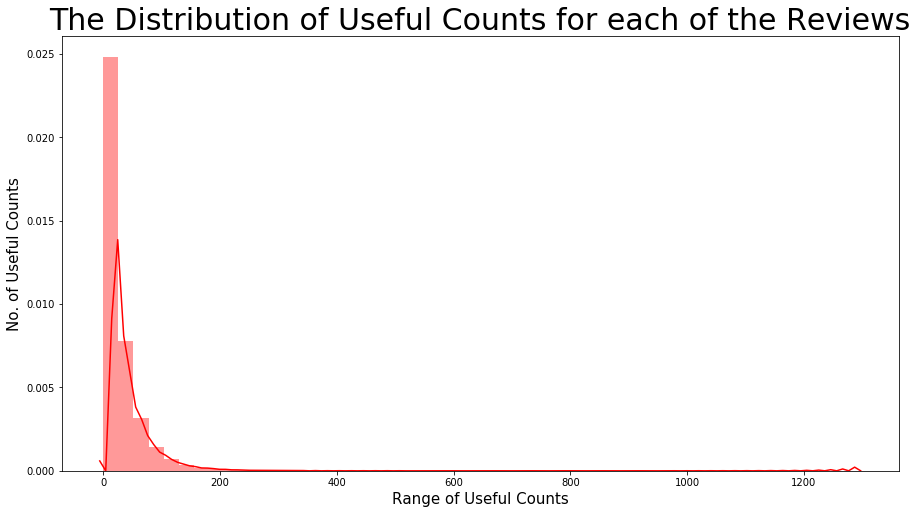

In [57]:
# useful counts is the number of users who found review useful
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'red')
plt.title('The Distribution of Useful Counts for each of the Reviews', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [58]:
rev=train_data['review'][2]
rev

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [59]:
# performing text mining on few review
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [60]:
tokens=[]
for i in train_data.review[:200]:
    tokens.append(word_tokenize(i))

In [61]:
# removing stopwords except few
stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)
    
filtered_words=[]
for i in tokens:
    for j in i:
        if j not in stops:
            filtered_words.append(j)
        
print(filtered_words[:100])  


['``', 'It', 'no', 'side', 'effect', ',', 'I', 'take', 'combination', 'Bystolic', '5', 'Mg', 'Fish', 'Oil', "''", '``', 'My', 'son', 'halfway', 'fourth', 'week', 'Intuniv', '.', 'We', 'became', 'concerned', 'began', 'last', 'week', ',', 'started', 'taking', 'highest', 'dose', '.', 'For', 'two', 'days', ',', 'could', 'hardly', 'get', 'bed', ',', 'cranky', ',', 'slept', 'nearly', '8', 'hours', 'drive', 'home', 'school', 'vacation', '(', 'unusual', '.', ')', 'I', 'called', 'doctor', 'Monday', 'morning', 'said', 'stick', 'days', '.', 'See', 'school', ',', 'getting', 'morning', '.', 'The', 'last', 'two', 'days', 'problem', 'free', '.', 'He', 'MUCH', 'agreeable', 'ever', '.', 'He', 'less', 'emotional', '(', 'good', 'thing', ')', ',', 'less', 'cranky', '.', 'He', 'remembering', 'things', '.']


In [62]:
# stemming the words- normalizing the sentences
from nltk.stem import PorterStemmer
ps=PorterStemmer()
for w in filtered_words:
    print(w,":",ps.stem(w))

`` : ``
It : It
no : no
side : side
effect : effect
, : ,
I : I
take : take
combination : combin
Bystolic : bystol
5 : 5
Mg : Mg
Fish : fish
Oil : oil
'' : ''
`` : ``
My : My
son : son
halfway : halfway
fourth : fourth
week : week
Intuniv : intuniv
. : .
We : We
became : becam
concerned : concern
began : began
last : last
week : week
, : ,
started : start
taking : take
highest : highest
dose : dose
. : .
For : for
two : two
days : day
, : ,
could : could
hardly : hardli
get : get
bed : bed
, : ,
cranky : cranki
, : ,
slept : slept
nearly : nearli
8 : 8
hours : hour
drive : drive
home : home
school : school
vacation : vacat
( : (
unusual : unusu
. : .
) : )
I : I
called : call
doctor : doctor
Monday : monday
morning : morn
said : said
stick : stick
days : day
. : .
See : see
school : school
, : ,
getting : get
morning : morn
. : .
The : the
last : last
two : two
days : day
problem : problem
free : free
. : .
He : He
MUCH : much
agreeable : agreeabl
ever : ever
. : .
He : He
less : less


In [63]:
# performing lemmatizations- similar to stemming but the main difference is stemming can often create non-existent words, whereas lemmas are actual words.
from nltk.stem import WordNetLemmatizer

In [64]:
lemmatizer = WordNetLemmatizer()

for i in filtered_words:
    print(i,":",lemmatizer.lemmatize(i))

`` : ``
It : It
no : no
side : side
effect : effect
, : ,
I : I
take : take
combination : combination
Bystolic : Bystolic
5 : 5
Mg : Mg
Fish : Fish
Oil : Oil
'' : ''
`` : ``
My : My
son : son
halfway : halfway
fourth : fourth
week : week
Intuniv : Intuniv
. : .
We : We
became : became
concerned : concerned
began : began
last : last
week : week
, : ,
started : started
taking : taking
highest : highest
dose : dose
. : .
For : For
two : two
days : day
, : ,
could : could
hardly : hardly
get : get
bed : bed
, : ,
cranky : cranky
, : ,
slept : slept
nearly : nearly
8 : 8
hours : hour
drive : drive
home : home
school : school
vacation : vacation
( : (
unusual : unusual
. : .
) : )
I : I
called : called
doctor : doctor
Monday : Monday
morning : morning
said : said
stick : stick
days : day
. : .
See : See
school : school
, : ,
getting : getting
morning : morning
. : .
The : The
last : last
two : two
days : day
problem : problem
free : free
. : .
He : He
MUCH : MUCH
agreeable : agreeable
ever :

In [65]:
from nltk.tokenize import sent_tokenize

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stops,ngram_range=(1,2))
for i in train_data.review[:200]:
    corpus=sent_tokenize(i)
    vectorizer.fit_transform(corpus).todense()
    print(vectorizer.vocabulary_)

{'no': 10, 'side': 13, 'effect': 4, 'take': 15, 'combination': 2, 'bystolic': 0, 'mg': 8, 'fish': 6, 'oil': 12, 'no side': 11, 'side effect': 14, 'effect take': 5, 'take combination': 16, 'combination bystolic': 3, 'bystolic mg': 1, 'mg fish': 9, 'fish oil': 7}
{'son': 88, 'halfway': 44, 'fourth': 35, 'week': 106, 'intuniv': 54, 'son halfway': 89, 'halfway fourth': 45, 'fourth week': 36, 'week intuniv': 107, 'became': 2, 'concerned': 13, 'began': 6, 'last': 55, 'started': 90, 'taking': 94, 'highest': 48, 'dose': 26, 'became concerned': 3, 'concerned began': 14, 'began last': 7, 'last week': 57, 'week started': 108, 'started taking': 91, 'taking highest': 95, 'highest dose': 49, 'two': 101, 'days': 19, 'could': 15, 'hardly': 46, 'get': 38, 'bed': 4, 'cranky': 17, 'slept': 86, 'nearly': 71, 'hours': 52, 'drive': 27, 'home': 50, 'school': 81, 'vacation': 104, 'unusual': 103, 'two days': 102, 'days could': 20, 'could hardly': 16, 'hardly get': 47, 'get bed': 39, 'bed cranky': 5, 'cranky sl

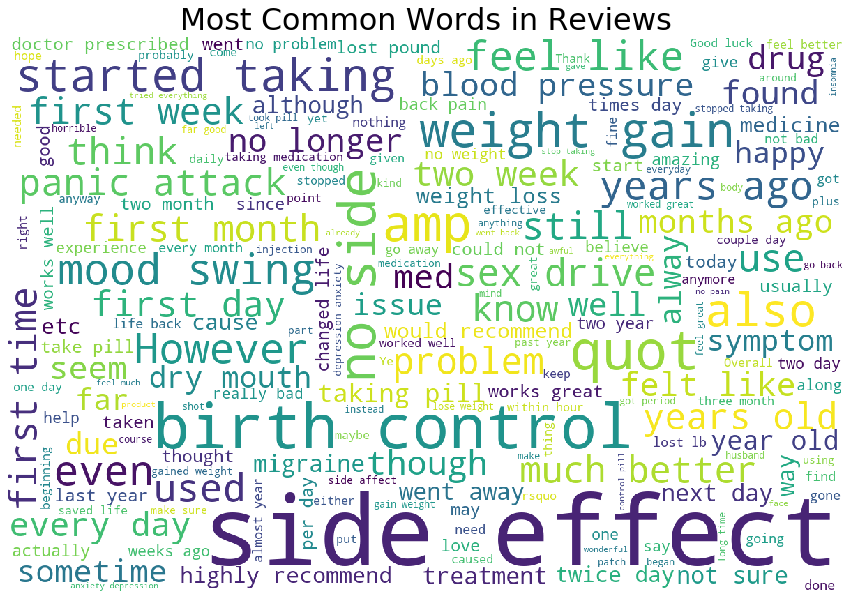

In [67]:
sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'white', stopwords = stops, width = 1200, height = 800).generate(sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [68]:
# now extracting year from date
data['Year'] = data['date'].dt.year

Text(0.5, 0, ' Year')

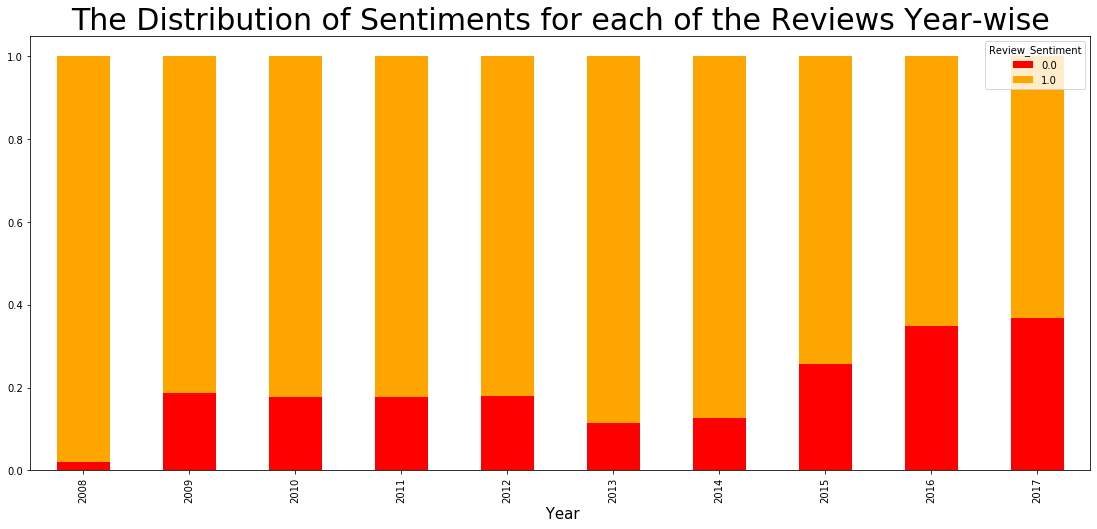

In [69]:
# plotting a stacked bar to compare the positive and negative sentiments count per year

df = pd.crosstab(data['Year'] ,data['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['red', 'orange', 'pink'])
plt.title('The Distribution of Sentiments for each of the Reviews Year-wise', fontsize = 30)
plt.xlabel(' Year', fontsize = 15)


### So here we see that the number of negative sentiments have increased with the years.

In [70]:
import re
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer


In [71]:
# above we have done text mining on sample of reviews just to view the basic insights
# now covering all the reviews
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [72]:
%time data['review_clean'] = data['review'].apply(review_to_words)

Wall time: 3min 23s


In [73]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'review_clean'],
      dtype='object')

In [81]:
commonCd = data['condition'].value_counts().nlargest(15)
commonConditions = pd.DataFrame(commonCd)
commonConditions

,condition
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
Bipolar Disorde,5604
Insomnia,4904
Weight Loss,4857
Obesity,4757
ADHD,4509


## Let's do the specific analysis of Birth Control and Depression symptoms and determining the most popular drugs for them

In [83]:
BirthControlDf = data[['condition','rating','drugName']]

In [84]:
BirthControlDf=BirthControlDf.loc[BirthControlDf['condition'] == 'Birth Control']

In [85]:
BirthControlDf['drugName'].value_counts().nlargest(15)

Etonogestrel                          4394
Ethinyl estradiol / norethindrone     3081
Levonorgestrel                        2884
Nexplanon                             2883
Ethinyl estradiol / levonorgestrel    2107
Ethinyl estradiol / norgestimate      2097
Implanon                              1496
Mirena                                1320
Skyla                                 1074
Lo Loestrin Fe                         896
Ethinyl estradiol / etonogestrel       827
NuvaRing                               824
Copper                                 800
Drospirenone / ethinyl estradiol       685
Medroxyprogesterone                    656
Name: drugName, dtype: int64

### Most of the people use Etonogestrel for Birth Control

In [86]:
# for Depression
DepressionDf = data[['condition','rating','drugName']]

In [87]:
DepressionDf=DepressionDf.loc[DepressionDf['condition'] == 'Depression']

In [88]:
DepressionDf['drugName'].value_counts().nlargest(15)

Bupropion         747
Sertraline        663
Venlafaxine       574
Desvenlafaxine    573
Pristiq           554
Escitalopram      515
Citalopram        513
Vortioxetine      458
Duloxetine        437
Cymbalta          411
Lexapro           408
Vilazodone        407
Viibryd           397
Fluoxetine        391
Zoloft            386
Name: drugName, dtype: int64

### Most common drug used by people in depression is Bupropion